# Evaluación de modelos 

Los ejemplos y la discusión que sigue están principalmente tomados del libro:

[*Introduction to Machine Learning with Python*](http://shop.oreilly.com/product/0636920030515.do)  
**Andreas C. Müller & Sarah Guido**  
O'Reilly 2017

En concreto, este _notebook_ está basado en el capítulo 5 del libro.

Github con el material del libro: [Github](https://github.com/amueller/introduction_to_ml_with_python). 

El libro está accesible *online* desde la [Biblioteca de la Universidad de Sevilla](https://fama.us.es), como recurso electrónico.

**ATENCIÓN**: Antes que nada, cargamos el módulo `mglearn`, que se puede descargar del  [Github](https://github.com/amueller/introduction_to_ml_with_python) del libro anterior. Recordar que para que funcione la carga, debemos poner la carpeta `mglearn` en cualquiera de las carpetas que usa python para cargar sus módulos (normalmente, funcionará colocando la carpeta `mglearn` en la misma carpeta en la que se coloque este notebook. Ademaś será necesario el archivo preamble.py que aparece en el mismo repositorio, y que se debe de colocar igualmente en la misma carpeta que este notebook. 

In [1]:
from preamble import *
import mglearn

Veremos en este tema cómo evaluar los modelos que se aprendan a partir de los datos. Es muy importante poder evaluar los modelos que se aprenden, especialmente por dos cuestiones:

- Cuantificar de alguna medida cómo de bueno es un modelo y su capacidad para generalizar de manera adecuada en conjunto de datos nuevos, en los que no se conozca su clasiicación.
- Ser capaz de comparar entre varios moldelos, por ejemplo en la fase de ajuste para decidir que valores de los hiperparámetros son los más adecuados. 

Veremos dos aspectos importantes relacionados con la evaluación de modelos:

1. Metodología para la evaluación y ajuste de modelos.
2. Distintas métricas

## Parte 1: Cuestiones metodológicas

En esta sección vemos metodologías para realizar la evaluación de los modelos 

### El método *Holdout*

Hasta ahora, el método que hemos usado para estimar el rendimiento de un clasificador de una manera objetiva es el método *hold out*, consistente en dividir el conjunto de datos en *entrenamiento* y *test*. Esto lo hace la función `train_test_split`. Por ejemplo:  

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# conjunto de datos aleatorio, por defecto tres clases, cada una "centradas" alrededor de un punto
X, y = make_blobs(random_state=0)
# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Regresión logística entrenado
logreg = LogisticRegression(solver="lbfgs",multi_class="auto").fit(X_train, y_train)
# Evaluación con tasa de aciertos
print("Rendimiento sobre test: {:.2f}".format(logreg.score(X_test, y_test)))

Rendimiento sobre test: 0.88


### Validación cruzada

El siguiente dibujo explica cómo se realiza validación cruzada: se divide el conjunto de datos en k partes iguales (preferentemente estratificadas) y se realizan k aprendizajes en el que se deja una de las partes fuera como conjunto en el que evaluar lo aprendido. La media de las evaluaciones es la evaluación que devuelve el método de validación cruzada. **Nota**: finalmente, el modelo se entrena con todo el conjunto de datos, y lo que obtiene validación cruzada puede verse como una evaluación de ese modelo final. 

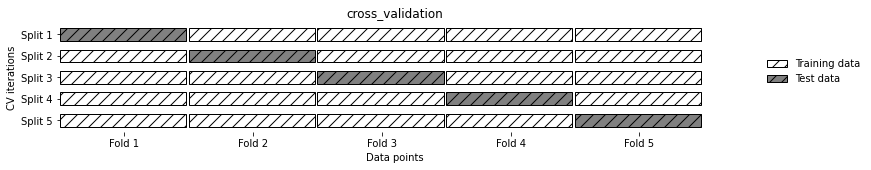

In [3]:
mglearn.plots.plot_cross_validation()

#### Validación cruzada en scikit-learn

La funcion `cross_val_score` del módulo `model_selection` implementa validación cruzada en scikit-learn. Tiene un parámetro `cv` que indica la estrategia de partición usada. Por defecto, tres trozos estratificados (es decir, tratando de que cada trozo tenga la misma proporción de clases que el original). En general `cv=k`, siendo `k` un entero, significa validación cruzada con `k` trozos estratificados. Pero se admiten más opciones para este parámetro. La métrica por defecto es la tasa de aciertos (`score`), pero también se puede cambiar esto con el parámetro `scoring`. 

El resultado que devuelve un array con los respectivos resultados de evaluar en cada una de las rondas de la validación cruzada. Por ejemplo: 

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(solver="liblinear",multi_class="auto")

scores = cross_val_score(logreg, iris.data, iris.target,cv=10)
print("Resultados de la evaluación cruzada: {}".format(scores))

Resultados de la evaluación cruzada: [1.    1.    1.    0.933 0.933 0.933 0.8   0.933 1.    1.   ]


Es bastante común devolver la media de los rendimientos obtenidos en cada validación. Veamos por ejemplos validación cruzada con 5 _folders_:

In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.2f}".format(scores.mean()))

Resultados de la evaluación cruzada: [1.    0.967 0.933 0.9   1.   ]
Evaluación media: 0.96


#### Ventajas de la validación cruzada

- No dependemos de la partición concreta, asegurándonos que todos los ejemplos forman parte al menos una vez de un conjunto de prueba
- Proporciona información sobre cómo de sensible es el modelo al conjunto de entrenamiento que usemos, ya que se producen varios entrenamientos y evaluaciones.
- Se aprovechan mejor los datos disponibles

**Desventaja**: Puede llegar a tener un coste computacional alto.

### Validación cruzada estratificada

A la hora de obtener las distintas particiones con las que llevar a cabo validación cruzada, es importante en muchos casos la  *estratificación* que se comentó más arriba: procurar que en cada una de las particiones la proporción de cada clase sea similar a la proporción en todo el conjunto. Por defecto, scikit learn realiza particiones estratificadas, si en el parámetro `cv` se proporciona el número de particiones. El siguiente dibujo lo esquematiza:

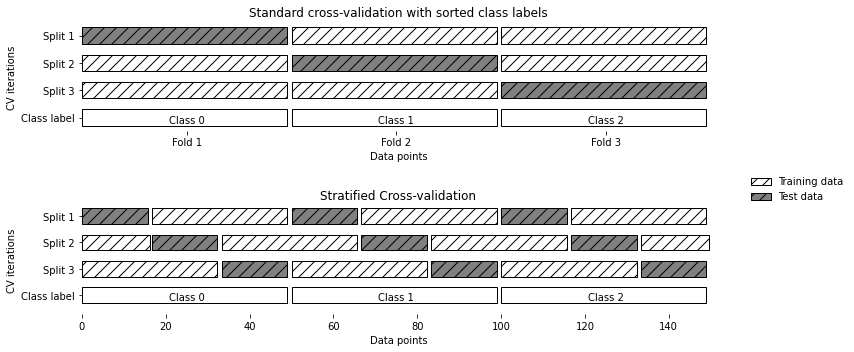

In [6]:
mglearn.plots.plot_stratified_cross_validation()

Vamos a ver con un ejemplo qué puede ocurrir si no hacemos particiones estratificadas. Para ello, consideremos el conjunto de datos del iris, con tres clases, en el que los ejemplos están ordenados por clases:

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Clases Iris:\n{}".format(iris.target))

Clases Iris:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Nota**: El parámetro `cv`, ademas de poder recibir un número entero con el número de particiones estratificadas, puede recibir distintas formas de especificar las particiones. 

Por ejemplo un objeto de la clase `KFold` puede ser un posible valor para el parámetro `cv` (un `Kfold` es en realidad un iterador cuyos elementos son particiones de los índices de los ejemplos en test y train). Al crear el objeto `Kfold` se indica el número de particiones, pero las particiones se hacen de manera secuencial, sin estratificar. Podríamos por ejemplo, especificar tres particiones sin estratificar de la siguiente manera:

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

El resultado de la validación sería desastroso para el ejemplo del Iris:

In [9]:
print("Resultados de la validación cruzada sin estratificar:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Resultados de la validación cruzada sin estratificar:
[0. 0. 0.]


Una manera de arreglarlo sería haciendo un shuffle en `Kfold`

In [10]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Resultados de la validación cruzada sin estratificar pero reordenando previamente de manera aleatoria:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Resultados de la validación cruzada sin estratificar pero reordenando previamente de manera aleatoria:
[0.9  0.96 0.96]


O bien directamente hacer validación cruzada estratificada:

In [11]:
print("Resultados de la validación cruzada:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=3)))

Resultados de la validación cruzada:
[0.96 0.96 0.94]


### Variaciones sobre validación cruzada

El parámetro `cv`, cuando recibe un número natural $n$, indica el número de particiones (y de validaciones) a realizar, siendo las particiones estratificadas. Pero existen otras opciones para ese parámetro, que se dan a través de objetos de distintas clases que proporcionan maneras de iterar sobre distintas particiones. Veamos algunos ejemplos

#### *Leave-one-out* 

Con `LeaveOneOut` obtenemos iteradores para obtener un numero de particiones igual al número de ejemplos, en los que cada vez se evalúa sobre un ejemplo el resultado de entrenar con el resto.  

In [12]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Número de iteraciones con cv: ", len(scores))
print("Media de las evaluaciones (tasas de acierto media): {:.2f}".format(scores.mean()))

Número de iteraciones con cv:  150
Media de las evaluaciones (tasas de acierto media): 0.95


Obviamente, este método de validación puede llegar a ser muy costoso en tiempo, sobre todo si el conjunto de datos es muy grande. Pero a veces es una buena opción para conjuntos de datos pequeños, proporcionando buenas estimaciones.   

#### Validación cruzada con particiones aleatorias

Una variante de validación cruzada consiste en obtener los conjuntos de entrenamiento y test de manera aleatoria cada vez (en este caso, no es necesario que se el tamaño de entrenamiento más test sea el del total de datos). Esta alternativa permite que el número de validaciones sea independiente del tamaño de los conjuntos de entrenamiento y test, y puede ser conveniente cuando tenemos un conjunto de datos muy grandes. La siguiente gráfica muestra esquemáticamente esta opción, con cuatro iteraciones y diez datos en total (tomando cinco para entrenamiento y dos para test):  

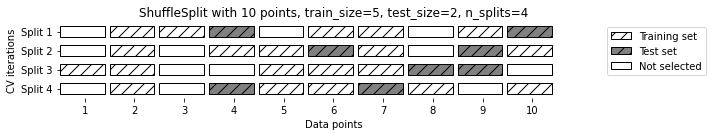

In [13]:
mglearn.plots.plot_shuffle_split()

En `scikit_learn`, podemos hacer esta técnica de validación si en el parámetro `cv` de `cross_val_scores` usamos un objeto de la clase `ShuffleSplit`. Por ejemplo:


In [14]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.2, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Resultados de la validación cruzada con particiones aleatorias:\n{}".format(scores))

Resultados de la validación cruzada con particiones aleatorias:
[0.9   0.933 1.    0.867 1.    0.933 0.967 1.    0.933 0.9  ]


## Parte 2: Ajuste de hiperparámetros: _Grid Search_

Como se ha visto con algunos de los clasificadores de los temas anteriores, existen lo que llamamos _hiperparámetros_, determinados valores propios del modelo que pueden afectar grandemente al rendimiento del mismo. Por ejemplo, la constante de regularización en regresión logística o la de suavizado en naive bayes. Téngase en cuenta que un mismo modelo puede tener varios hiperparámetros.

No debemos confundir un _hiperparámetro_ con un _parámetro_, entendiendo estos últimos como aquellos valores que se _aprenden_ en el modelo: por ejemplo, los pesos en regresión logística o las probabilidades condicionadas en naive bayes. Dicho esto, es bastante común llamar también parámetros a los hiperparámetros, cuando el contexto no da lugar a confusión. 

Encontrar buenos valores para los hiperparámetros es muy importante para el buen rendimiento del modelo que finalmente se aprenda. Usualmente, esto significa probar distintas combinaciones de valores para cada hiperparámetro, aprendiendo el modelo y evaluándolo en cada una de esas combinaciones, para finalmente tomar la mejor combinación. Esta técnica se denomina _grid search_ y es tan común que `scikit-learn` la tiene implementada. 

### Un  _Grid-Search_  casero

   Supongamos que queremos buscar unos valores adecuado para los parámetros `C` y `gamma` para una SVM con núcleo RBF. Ya vimos que `C` indica la regularización y que `gamma` indica el ancho de banda del núcleo. El siguiente código intenta todas las posibles combinaciones para seis valores de `C` y seis valores de `gamma`:

In [15]:
# Implementación "naive" de grid search 
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # por cada combinación de valores de los parámetros, entrenamos un SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # Y lo evaluamos sobre el conjunto de test
        score = svm.score(X_test, y_test)
        # Nos vamos quedando con el de mejor resultado
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Mejor resultado: {:.2f}".format(best_score))
print("Mejor combinación de valores: {}".format(best_parameters))

Mejor resultado: 0.97
Mejor combinación de valores: {'C': 100, 'gamma': 0.001}


#### ¡Cuidado a la hora de dar el rendimiento final!

Un error típico que se puede cometer ahora es decir que el modelo encontrado tiene un 97% de precisión en el conjunto de datos. Sin embargo, esto sería demasiado optimista, ya que hemos usado el conjunto de test para buscar la mejor combinación de parámetros, y por tanto, se ha _filtrado_ información del conjunto de test al modelo. Para que la estimación del rendimiento sea fiable, la medida final ha de hacerse sobre un conjunto de test totalmente independiente, que _no se ha usado ni para el aprendizaje ni para el ajuste de los hiperparámetros_. 

### Conjuntos de entrenamiento, validación y prueba 
Por la razón anterior es bastante usual partir el conjunto de datos original en tres partes: entrenamiento (para entrenar el modelo), validación (para ajustar los parámetros del modelo) y test (para dar una estimación del rendimiento del modelo finalmente escogido). El siguiente dibujo expresa esta idea:

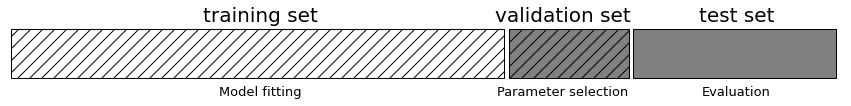

In [16]:
mglearn.plots.plot_threefold_split()

El siguiente código implementa esta idea, haciendo el mismo grid search que antes. Como se observa, el resultado sobre un conjunto de test independiente es algo peor que sobre el conjunto de validación:

In [17]:
from sklearn.svm import SVC
# Una primera partición: entrenamiento+validación y test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# Partimos entrenamiento+validación en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Tamaño del conjunto de entrenamiento: {}\nTamaño del conjunto de validación: {}\nTamaño del conjunto de test:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # por cada combinación de valores de los parámetros, entrenamos un SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # lo evaluamos sobre validación
        score = svm.score(X_valid, y_valid)
        # nos vamos quedando con el mejor resultado
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# Volvemos a entrenar el modelo con la mejor combinación encontrada, sobre entrenamieno+validación  
# y evaluamos el rendimiento sobre el conjunto de prueba 
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Mejor resultado sobre validación: {:.2f}".format(best_score))
print("Mejor combinación de valores: ", best_parameters)
print("Evaluación sobre el conjunto de test: {:.2f}".format(test_score))

Tamaño del conjunto de entrenamiento: 84
Tamaño del conjunto de validación: 28
Tamaño del conjunto de test: 38

Mejor resultado sobre validación: 0.96
Mejor combinación de valores:  {'C': 10, 'gamma': 0.001}
Evaluación sobre el conjunto de test: 0.92


## Parte 3: Grid-search con validación cruzada

Aunque la técnica anterior es bastante usada, hay que decir que depende bastante de la manera en la que se produzcan las particiones (por ejemplo, en los dos ejemplos anteriores, se han encontrado valores de `C` distintos). 

Una mejor evaluación de la capacidad de generalización del modelo, podemos evaluar cada combinación de parámetros usando validación cruzada. Es lo que se hace en la siguiente implementación: 

In [18]:
# Nótese que aquí no dividimos el conjunto de datos en tres, sino en dos:
#   - entrenamiento+validación
#   - test

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # por cada combinación de valores de los parámetros, entrenamos un SVC
        svm = SVC(gamma=gamma, C=C)
        # Realiza validación cruzada 
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # calcula el resultado medio de la validación cruzada
        score = np.mean(scores)
        # nos vamos quedando con la mejor combinación
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# Volvemos a entrenar el modelo con la mejor combinación encontrada, sobre entrenamieno+validación  
# y evaluamos el rendimiento sobre el conjunto de prueba
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Mejor resultado (media) en validación cruzada: {:.2f}".format(best_score))
print("Mejor combinación de valores: ", best_parameters)
print("Evaluación sobre el conjunto de test: {:.2f}".format(test_score))


Mejor resultado (media) en validación cruzada: 0.97
Mejor combinación de valores:  {'C': 10, 'gamma': 0.1}
Evaluación sobre el conjunto de test: 0.97


El siguiente gráfico describe la metodología de evaluación con grid search + validación cruzada que acabamos de ver. Nótese que una vez encontrada la mejor combinación de parámetros, el modelo final es obtenido entrenando con esa combinación parámetros, sobre el total del conjunto de entrenamiento (recuérdese que en una validación cruzada, los entrenamientos no se hacen nunca sobre todo el conjunto).  

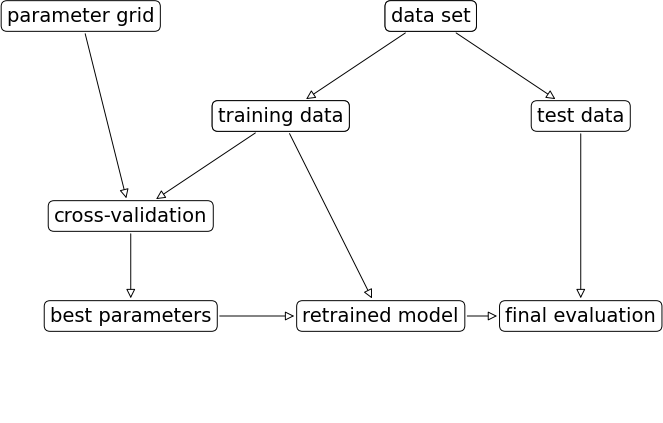

In [19]:
mglearn.plots.plot_grid_search_overview()

Obviamente, la mayor desventaja de esta metodología es el tiempo que se puede llegar a necesitar para hacer todos los entrenamientos: por ejemplo, en este caso hay un total de 180 entrenamientos: cada validación hace 5 entrenamientos (ya que `cv=5`) y esos para cada una de las 36 combinaciones posibles. 

### Grid search con validación cruzada en scikit learn

Puesto que la técnica de ajuste de parámetros que se ha descrito (grid search + validación cruzada) es ampliamente usada, scikit learn la tiene implementada en la clase `GridSearchCV`. Para ello, lo primero es especificar el _grid_ de posibles valores de los parámetros, y eso se hace con un diccionario. Por ejemplo: 

In [20]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

A continuación se describe cómo podemos usar `GridSearchCV` para hacer exactamente lo mismo que en la anterior implementación:

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True) # Se necesita par evitar warnings a partir de la 0.21

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [24]:
print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(X_test, y_test)))

Mejor resultado (media) en validación cruzada: 0.97
Mejor clasificador encontrado: {} SVC(C=10, gamma=0.1)
Evaluación sobre el conjunto de test: 0.97


Es importante destacar que que `GridSearchCV` es un clasificador, y que por tanto dispone de los métodos usuales en un clasificador: `fit`, `predict`, `score`,.... La única diferencia es que `fit` implica el entrenamiento de múltiples modelos. Pero una vez entrenado, tenemos un clasificador (el que resulta del entrenamiento final con la mejor combinación de parámetros encontrada). 

##### Analizando el resultado de la búsqueda

`GridSearchCV` almacena mucha información del todo el proceso de búsqueda. Eventualmente, en el ajuste de hiperparámetros podría ser de utilidad analizar con detalle toda esa información, por si puede sernos de utilidad e incluso para ampliar la búsqueda. Toda la información que se recolecta es accesible a través del atributo `cv_results_`, y está en forma de diccionario.

Veamos la información de las cinco primeras combinaciones de parámetros, usando pandas (cada fila corresponde con una combinación concreta):


In [25]:
import pandas as pd
# convertimos a Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# Mostramos las cinco primeras filas
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,...,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.13e-03,1.95e-04,6.17e-04,7.10e-05,...,0.37,0.36,0.37,5.58e-03
1,9.49e-04,3.55e-05,5.55e-04,2.96e-05,...,0.37,0.36,0.37,5.58e-03
2,8.71e-04,2.01e-05,5.17e-04,3.01e-05,...,0.37,0.36,0.37,5.58e-03
3,8.22e-04,2.90e-05,5.00e-04,5.33e-05,...,0.37,0.36,0.37,5.58e-03
4,9.01e-04,8.80e-05,5.40e-04,6.83e-05,...,0.37,0.36,0.37,5.58e-03


Mejor aún, podemos ver los resultados de cada combinación en la grid search, mediante un mapa de calor bidimensional:

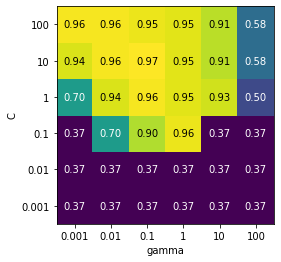

In [26]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

En el mapa de calor, se observa cómo de sensible es SVC al ajuste de ambos parámetros `C`y `gamma`. Cambia mucho de unas combinaciones a otras. 

Veamos lo que ocurre con otros posibles _grids_: 

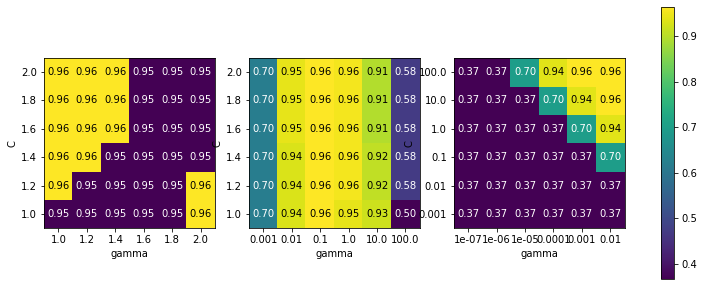

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

En el primero de los grids, se observa que todas las combinaciones dan el mismo rendimiento. En este caso, habría que tomar una variadad mayor de valores. Puede ocurrir también que los parámetros no sean en realidad significativos ni importantes para el modelo. 

En el segundo, se ve variación solamente por el parámetro `gamma`. Puede que el rango de valores de `C` no sea el adecuado, o incluso que `C`no fuera importante.

Por último, en el tercero, se observa que los cambios se dan en la parte "alta-derecha" de la combinación. Probablemente porque haya que "subir" el rango de ambos parámetros. 

#### Grid Search en espacios que no son "rejillas"

Hay veces en que un _grid_ no es la mejor opción para probar una serie de combinaciones de parámetros, ya que puede dar lugar a probar combinaciones de valores que no tienen mucho sen tido. Por ejemplo, en un SVC, si el kernel es lineal, no tiene sentido usar el parámetro `gamma` y sería una pérdida de tiempo combinar valores de gamma con el valor de otros hiperparámetros. En ese caso, es posible dar una _lista de grids_ en lugar de un solo _grid_: 

In [28]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [29]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print("Mejor combinación de valores: {}".format(grid_search.best_params_))
print("Mejor rendimiento en validación cruzada: {:.2f}".format(grid_search.best_score_))

Mejor combinación de valores: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor rendimiento en validación cruzada: 0.97


Como antes, podemos ver los resultados con detalle (ponemos la tabla traspuesta para poder ver mejor las combinaciones de valores que se han intentado). Como se observa, cuando el kermel es `linear`, no se usa el parámetro `gamma`:

In [30]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,...,38,39,40,41
mean_fit_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
param_C,0.0,0.0,0.0,0.0,...,0.1,1,10,100
param_gamma,0.0,0.01,0.1,1,...,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,...,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.35,0.35,0.35,0.35,...,1.0,1.0,1.0,0.96
split1_test_score,0.35,0.35,0.35,0.35,...,0.91,0.96,1.0,0.96


## Parte 4: Métricas para evaluar el rendimiento

Hasta ahora, hemos usado una única manera de medir el rendimiento de un clasificador sobre un conjunto de datos: mediante la tasa de aciertos (_accuracy_) damos la proporción de ejemplos bien clasificados, respecto del total de ejemplos del conjunto. Pero hay situaciones en que esta manera de medir el rendimiento no es la más apropiada.   


### Métricas en clasificación binaria


En esta sección supondremos que en el problema existen dos posibles clasificaciones que llamaremos positiva y negativa. En las diapositivas del tema hemos definido dos tipos de errores en una clasificación binaria:

* Falso positivo (FP): un ejemplo que es realmente negativo es clasificado como positivo por el modelo 
* Falso negativo (FN): un ejemplo que es realmente posiitivo es clasificado como negativo por el modelo

Dualmente, existen dos tipos de aciertos en una clasificación binaria:

* Falso positivo (TP): un ejemplo positivo bien clasificado por el modelo 
* Falso negativo (TN): un ejemplo negativo bien clasificado por el modelo

Dependiendo del problema concreto, uno tipo de error puede ser más grave que otro. Por ejemplo, en el diagnśtico de enfermedades, un FP es más aceptables que un FN.  

#### Conjuntos de datos no equilibrados

Cuando una de las dos clases es mucho más frecuente que la otra, entonces la _tasa de error_ no es una buena métrica que expresa bien el verdadero rendimiento de un clasificador. Por ejemplo, si una de las clases aparece en el 99% de los ejemplos, entonces un clasificador que siempre predijera esa clase tendría un 0.99 de tasa de aciertos y evidentemente no sería un buen modelo. Ncesitamos afinar más, buscando métricas que reflejen realmente el rendimiento del clasificador. 

Vamos a ver ahora estos conceptos usando un problema de clasificación binaria en el que una de las clases aparece el 90% de las veces.

Para ello, primero cargamos el conjunto de datos de dígitos escritos a mano que se encuentra en **UCI ML**. Pero los distintos valores de clasificación los convertimos en `True` si es un 9 y en `False` en el resto de los casos.

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

En scikit learn tenemos la clase `DummyClassifier`, que implementa clasificadores que hacen predicciones basándose en reglas muy simples. Una de estas reglas simples consiste en predecir siempre la clase mayoritaria (`most_frequent`). Evidentemente, en este caso, tendremos una tasa de acierto del 90%: 

In [32]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("Predicción única: {}".format(np.unique(pred_most_frequent)))
print("Tasa de aciertos: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Predicción única: [False]
Tasa de aciertos: 0.90


Para comparar, veamos la tasa de aciertos en el caso de tres clasificadores más:

* Árbol de decisión
* Regresión Logística
* Un clasificador _Dummy_ que predice clases aleatoriamente, siguiendo probabilidades proporcionales a las clases (es el comportamiento por defecto de `DummyClassifier`)



In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Tasa de acierto del árbol de decisión: {:.2f}".format(tree.score(X_test, y_test)))

Tasa de acierto del árbol de decisión: 0.92


In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1,solver="liblinear").fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg.score(X_test, y_test)))

Tasa de acierto en regresión logística: 0.98


In [35]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Tasa de acierto de clasificador aleatorio: {:.2f}".format(dummy.score(X_test, y_test)))

Tasa de acierto de clasificador aleatorio: 0.90


Como se observa, el clasificador _Dummy_ que predice la clase más frecuente tiene una tasa de aciertos algo menor que regresión logística, pero casi igual que el árbol de decisión. Incluso el clasificador aleatorio tiene una "buena" tasa de rendimiento cercana al 80%. Es evidente que hace falta una mejor métrica que en estas situaciones sea capaz de discernir el verdadero rendimiento de un clasificador. 

##### Matrices de confusión

Las matrices de confusión son una buena herramienta para analizar el rendimiento de un clasificador binario. En scikit learn tenemos una función que la calcula. Por ejemplo:

In [36]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


Como se observa en el gráfico siguiente, la matriz de confusión en el caso de una clasificación binaria nos proporciona cuántos verdaderos positivos (TP), falsos positivos (FP), falsos negativos (FN) y verdaderos positivos (TP) se tienen en una predicción hecha por un clasificador, respecto de los valores de clasificación correctos. 

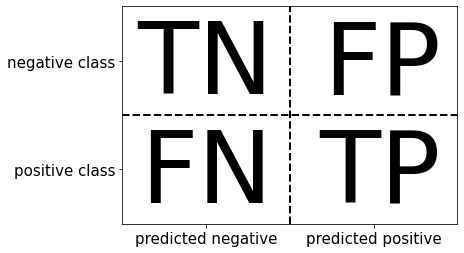

In [37]:
mglearn.plots.plot_binary_confusion_matrix()

Nótese que la tasa de aciertos (_accuracy_) se puede definir usando esas cuatro cantidades:

###### Definición de  tasa de acierto (_accuracy_):
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

Lo que sigue son las matrices de confusión de los cuatro clasificadores anteriores:

In [38]:
print("Predicción usando la clase más frecuente:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nPredicción aleatoria:")
print(confusion_matrix(y_test, pred_dummy))
print("\nÁrbol de decisión:")
print(confusion_matrix(y_test, pred_tree))
print("\nRegresión logística")
print(confusion_matrix(y_test, pred_logreg))

Predicción usando la clase más frecuente:
[[403   0]
 [ 47   0]]

Predicción aleatoria:
[[403   0]
 [ 47   0]]

Árbol de decisión:
[[390  13]
 [ 24  23]]

Regresión logística
[[401   2]
 [  8  39]]


Como se observa en las correspondientes matrices de confusión, el problema de los clasificadores simples (los dos primeros) es que tienen muy pocos verdaderos positivos. Sin embargo, el árbol de decisión y la regresión logística tienen en ese aspecto resultados mucho más razonables. E incluso se puede ver que regresión logística es mejor que árboles de decisión en este caso, ya que tiene una buena tasa de aciertos en el caso positivo. 

La matriz de confusión proporciona una buena información sobre la calidad de las predicciones, pero a veces es útil tener métricas que resuman esta información en una o varias cantidades simples:

##### Precision

La precisión es una métrica adecuada si lo que queremos es tratar de controlas que haya pocos falsos positivos en nuestra predicción. Para ello, medimos la proporción de realmente positivos de entre los que se han predicho como positivos: 

\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

##### Recall

La _exhaustividad_ (aunque usaremos el vocablo inglés original, _recall_) mide la proporción de ejemplos que se han predicho positivos de entre todos los positivos. El _recall_ sería máximo (es decir, 1) si no tenemos falsos negativos:

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

Existe un compromiso entre precision y recall. Por ejemplo, si nuestro clasificador siempre predice positivo, el recall sería perfecto, pero la precisión bajaría mucho (tanto más cuanto más negativos haya). Por otro lado, prediciendo todos los ejemplos como negativos (excepto uno de los positivos como positivo), tendríamos una precisión perfecta, pero el recall sería muy bajo.  

Si bien precision y recall en conjunto suponen una buena métrica para evaluar en problemas binarios en el que las clases no están equilibradas, a veces se usa una única medida, que en este caso sería la [media armónica](https://es.wikipedia.org/wiki/Media_arm%C3%B3nica) de ambas cantidades, denominado medida F1:

##### Medida F1

\begin{equation}
\text{F1} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

Calculemos los F1 de los cuatro clasificadores anteriores:

In [39]:
from sklearn.metrics import f1_score
print("Medida F1 clase más frecuente: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("Medida F1 aleatorio: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("Medida F1 árbol de decisión: {:.2f}".format(f1_score(y_test, pred_tree)))
print("Medida F1 regresión logística: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

Medida F1 clase más frecuente: 0.00
Medida F1 aleatorio: 0.00
Medida F1 árbol de decisión: 0.55
Medida F1 regresión logística: 0.89


Nótese cómo F1 nos sirve para distinguir claramente el rendimiento de los dos primeros respecto de los clasificadores "serios".

Aunque como se ve el F1 puede llegar a captar en una sola cifra la comparativa entre clasificadores, es difícil de interpretar intuitivamente. Si se prefieren ver todas las medidas, es útil usar la función `classification_report`:

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["no nueve", "nueve"]))

              precision    recall  f1-score   support

    no nueve       0.90      1.00      0.94       403
       nueve       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Como se observa, `classification_report` produce una línea por clase, y calcula precision, recall y medida F1 en cada clase, suponiendo que esa es la clase que se toma como "positiva". Nótese que la consideración de "clase positiva" afecta bastante a los valores que toman las medidas. 

Lo que sigue son los `classification_reports` de los restantes clasificadores:

In [41]:
print(classification_report(y_test, pred_dummy,
                            target_names=["no nueve", "nueve"]))

              precision    recall  f1-score   support

    no nueve       0.90      1.00      0.94       403
       nueve       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
print(classification_report(y_test, pred_tree,
                            target_names=["no nueve", "nueve"]))

              precision    recall  f1-score   support

    no nueve       0.94      0.97      0.95       403
       nueve       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [43]:
print(classification_report(y_test, pred_logreg,
                            target_names=["no nueve", "nueve"]))

              precision    recall  f1-score   support

    no nueve       0.98      1.00      0.99       403
       nueve       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



Como se puede ver, si en vez de "nueve" se toma "no nueve" como la clase positiva, la medida F1 ya no nos sirve para distinguir el verdadero rendimiento de los _dummy_ frente a los dos clasificadores "serios". Esto muestra que la clase que se tome como positiva tiene un impacto grande en las medidas que se obtienen. Y que a veces es necesario mirar en conjunto todas las medidas para hacerse una idea del verdadero rendimiento. 

## Parte 5:  Usando la incertidumbre en las predicciones: umbrales

Como hemos visto en temas anteriores, la mayoría de los clasificadores no solamente hacen predicciones de la clase, sino que suelen proporcionar un grado de certidumbre en la predicción que realizan. En scikit learn, ese grado de certidumbre puede obtenerse mediante dos posibles métodos:

* `decision_function`: en este caso, el grado de certidumbre se da en forma de valor en los números reales (positivo o negativo). En ese caso, el método `predict` devolverá la clase positiva si la función de decisión devuelve un valor positivo, y la clase negativa en caso contrario. Es el caso, por ejemplo, de un clasificador basado en máquinas de vectores soporte `SVC`. 

* `predict_proba`: en este caso, el grado de certidumbre se da en forma de probabilidad (un valor entre 0 y 1). En ese caso, el método `predict` devolverá la clase positiva si la probabilidad está por encima de 0.5, y la clase negativa en caso contrario. Por ejemplo, el caso de regresión logística. 

En ambos casos existen unos valores por defecto del _umbral_ en la incertidumbre, a partir del cual decidimos clasificar un ejemplo como de la clase positiva. En el caso de funciones de decisión, ese umbral es 0 y en el caso probabilístico, el umbral por defecto es 0.5. Pero podríamos en principio tomar umbrales diferentes (tanto al alza como a la baja) para considerar que un ejemplo está en la clase positiva. 

Podríamos así ser más o menos estrictos a la hora de la clasificación. Y esto influiría indudablemente en las métricas definidas anteriormente, como vamos a ver con el ejemplo siguiente. 

En cualquier caso, si usamos solamente las predicciones devueltas por `predict` para evaluar el rendimiento, entonces estamos perdiendo información. Veremos en esta sección cómo podemos incorporar a las métricas esa información.

Vamos a ver con un ejemplo gráfico cómo influye en las métricas de precision y recall el usar un umbral determinado. Generamos un conjunto de ejemplos bidimensionales aleatorios, con dos clases no equilibradas (circulos azules y triángulos rojos en el dibujo). Además, entrenamos un clasificador basado en máquinas de vectores soporte, `SVC`. 

In [44]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

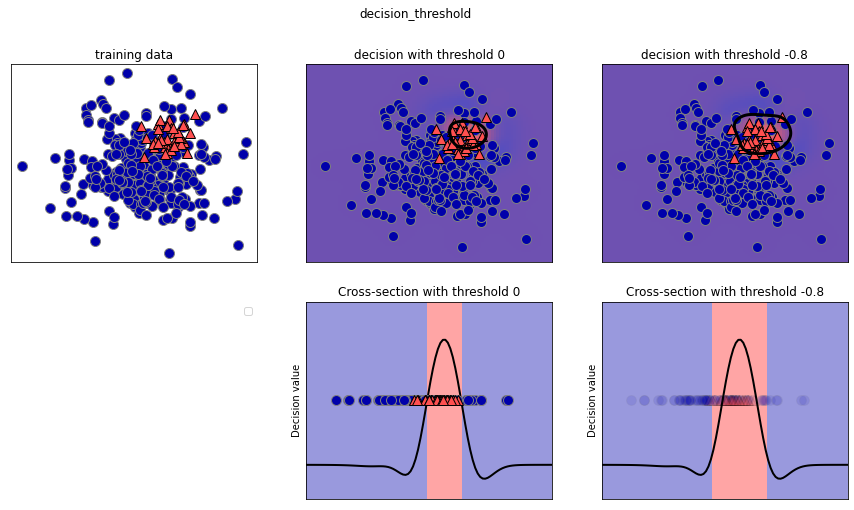

In [45]:
mglearn.plots.plot_decision_threshold()

Supongamos que la clase de los triángulos rojos es la clase considerada como "positiva". El interior de la circunferencia negra en la imagen central de la fila de arriba que indica los puntos que serían clasificados como positivos si el clasificador `svc` usa el umbral de 0 (el umbral por defecto) para considerar que un ejemplo es de la clase positiva. Como se ve, se quedarían algunos ejemplos de la clase positiva clasificados como negativos (los puntos rojos fuera de la línea negra).

Podemos analizar el `classification_report` tomando el conjunto de test:

In [46]:
print(classification_report(y_test, svc.predict(X_test),target_names=["azul", "rojo"]))

              precision    recall  f1-score   support

        azul       0.97      0.89      0.93       104
        rojo       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



Supongamos por un momento que los puntos rojos representan pacientes con cáncer y que los azules representan la ausencia de cáncer. En este caso, un recall de 0.67 es una cifra muy baja. No queremos que sólo un 67% de los pacientes con cáncer sean detectados. Preferimos ser menos restrictivos a la hora de predecir cáncer, ya que en este caso el perjuicio de falso negativo sería muy grande.

Por ello, podemos bajar el umbral un poco (a -0.8 en este caso). Hay que recordar que en el caso de `SVC` el modelo aprende un hiperplano y que `decision_function` intuitivamente indica la distancia del punto al hiperplano, en un lado (positivo) o en el otro lado (negativo). Por tanto, estamos dejando que se clasifiquen como negativos puntos que quedan en el otro lado del hiperplano aprendido. 

In [47]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [48]:
print(classification_report(y_test, y_pred_lower_threshold,target_names=["azul", "rojo"]))

              precision    recall  f1-score   support

        azul       1.00      0.82      0.90       104
        rojo       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



Como se ve, sube el recall (a 1 en este caso) y baja un poco la precision. Es decir, hemos dado prioridad a no tener falsos negativos, al precio de tener más falsos positivos. Gráficamente (figura de la derecha arriba), hemos ampliado el círculo negro, incuyendo más puntos rojos, pero también más azules. 

En el caso de modelos que devuelven una probabilidad con `predict_proba`, el valor por umbral por defecto es 0.5. Subir o bajar ese umbral tendría el mismo efecto que se acaba de explicar, sobre los errores que se pueden cometer. Es decir:

* Subir el umbral: menos FP y más FN (sube la precisión pero baja el recall).
* Bajar el umbral: menos FN y más FP (sube el recall pero baja la precision).

## Parte 6:  Usando la incertidumbre en las predicciones: curvas

### Curva Precision-Recall y precisión media

En el ejemplo anterior, hemos bajado el umbral a -0.8 y hemos visto cómo los valores de precision y recall cambian. Es un ejercicio interesante tomar otros valores de umbral y ver cómo precision y recall van cambiando (intentarlo). Se puede ir cambiando el umbral hasta encontrar un par de valores para precision y recall que sean un compromiso entre ambas métricas, adecuado para la aplicación en particular.   

De hecho, muchas veces es interesante ver cómo cambian los valores de precision ($p$)  y recall ($r$) con los distintos umbrales, y eso se hace de mánera gráfica con lo que se conoce como _curva precision-recall_ o _curva PR_:  es la curva que describen todos los puntos $(p,r)$ que se obtienen si vamos variando el umbral. En scikit learn podemos calcular esos puntos con `precision_recall_curve`:

In [49]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

Esta función `precision_recall_curve` devuelve tres arrays: respectivamente con los valores de precisión, de recall y de umbrales. La lista de umbrales la dan los distintos valores de `decision_function` o de `predict_proba`. Podemos imprimir esta información, y ver cómo va variando la precision y el recall:

In [50]:
for u,p,r in zip(thresholds,precision,recall):
    print("Umbral: {:.3f}. (P,R)=({:.2f},{:.2f})".format(u,p,r))

Umbral: -0.751. (P,R)=(0.32,1.00)
Umbral: -0.587. (P,R)=(0.30,0.89)
Umbral: -0.487. (P,R)=(0.31,0.89)
Umbral: -0.444. (P,R)=(0.32,0.89)
Umbral: -0.404. (P,R)=(0.33,0.89)
Umbral: -0.290. (P,R)=(0.35,0.89)
Umbral: -0.242. (P,R)=(0.36,0.89)
Umbral: -0.193. (P,R)=(0.38,0.89)
Umbral: -0.179. (P,R)=(0.40,0.89)
Umbral: -0.166. (P,R)=(0.37,0.78)
Umbral: -0.160. (P,R)=(0.33,0.67)
Umbral: 0.086. (P,R)=(0.35,0.67)
Umbral: 0.146. (P,R)=(0.38,0.67)
Umbral: 0.192. (P,R)=(0.40,0.67)
Umbral: 0.370. (P,R)=(0.43,0.67)
Umbral: 0.520. (P,R)=(0.38,0.56)
Umbral: 0.523. (P,R)=(0.42,0.56)
Umbral: 0.532. (P,R)=(0.45,0.56)
Umbral: 0.632. (P,R)=(0.40,0.44)
Umbral: 0.744. (P,R)=(0.44,0.44)
Umbral: 0.872. (P,R)=(0.50,0.44)
Umbral: 0.880. (P,R)=(0.57,0.44)
Umbral: 0.884. (P,R)=(0.67,0.44)
Umbral: 0.978. (P,R)=(0.60,0.33)
Umbral: 1.000. (P,R)=(0.50,0.22)
Umbral: 1.070. (P,R)=(0.67,0.22)
Umbral: 1.084. (P,R)=(0.50,0.11)
Umbral: 1.251. (P,R)=(1.00,0.11)


Podemos incluso dibujar la curva con los puntos que calcula `precision_recall_curve`. El siguiente código lo hace, aunque con un conjunto de puntos algo mayor, para obtener una curva más suavizada (téngase en cuenta que los distintos umbrales que se usan son los que devuelve en este caso la función de decisión o la función de probabilidad, es por esto que con pocos ejemplos en el conjunto de test saldría una curva "quebrada"): 

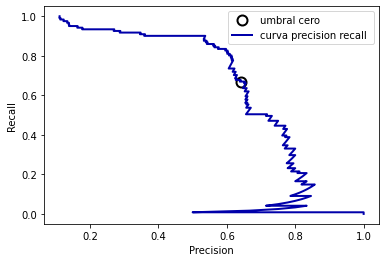

In [51]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="umbral cero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="curva precision recall ")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

Como se ha dicho, la curva resulta de unir todos los puntos $(p,r)$ que se obtienen para los distintos umbrales de decisión. Como se ve, la cuva empieza con un recall de 1.0, pero con precisión cerca de 0, correspondiendo con un umbral muy bajo en el que todo se clasifica como positivo. A medida que el umbral aumenta, el recall va bajando, pero sube la precisión. Con el umbral más alto, se baja el recall casi a 0 y la precisión sube a 1.0. En la gráfica, el círculo negro se corresponde con el umbral por defecto que usa `predict`. En general, una curva PR lo más pegada a la esquina superior derecha indica un mejor clasificador.  

En la gráfica podemos ver que se puede conseguir una precisión de 0.5 con un recall alto de alrededor de 0.85. Para precisiones mayores, el recall baja drásticamente. 

Podemos usar las curvas PR para comparar el comportamiento de distintos clasificadores. Por ejemplo, el siguiente código dibuja la curva anterior (clasificador `SVC`) frente a la curva de un clasificador _random forest_:

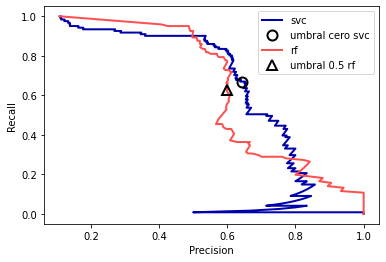

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="umbral cero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="umbral 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

También calculamos las medidas F1 en ambos casos:

In [53]:
print("f1_score de random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score de svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score de random forest: 0.610
f1_score de svc: 0.656


Comparando las curvas, vemos que si lo que se busca son valores altos de recall, random forest es mejor. Lo mismo si queremos valores de precisión altos. Sin embargo en zonas intermedias (valor medios tanto de precision como recall), SVC se comporta mejor. Este análisis más fino solo es posible a través del estudio de las curvas, ya que como se observa, la medida F1 de ambos clasificadores no nos proporciona esa información.  

A veces se usa un único número para intentar "medir" la curva PR. Puesto que la curva PR indica un mejor comportamiento cuanto más "pegada" esté a la esquina superior derecha, entonces tiene sentido medir la curva con el área que deja por debajo en el cuadrado $[0,1]\times[0,1]$ (ese área seá un número entre 0 y 1). Una estimación de esto es llamada _precisión media_, que en scikit learn se calcula con [`average_precision_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html). En el caso de los dos clasificadores anteriores:

In [54]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Precisión media de random forest: {:.3f}".format(ap_rf))
print("Precisión media de svc: {:.3f}".format(ap_svc))

Precisión media de random forest: 0.660
Precisión media de svc: 0.666


Según esta medida, los dos clasificadores tienen un comportamiento similar, quizás un poco mejor SVC. Esta comparativa es algo distinta de la que obteníamos con F1. 

### Curva ROC (Receiver Operating Characteristics) y AUC (area under curve)

Otra curva que se usa muy frecuentemente para analizar el comportamiento de clasificadores binarios, y especialmente en problemas en el que las clases no están equilibradas, es la curva ROC (siglas de _Receiver Operating Characteristics_). La idea es similar a la de la curva PR, pero en este caso la curva se forma con los puntos $(FPR,TPR)$ que se generan variando el umbral. Aquí $TPR$ es _true positive rate_ y es otro nombre para _recall_; y $FPR$ es _false Postive rate_ y se defina como la tasa de error que tiene el clasificador en el conjunto de ejemplos negativos. Es decir:

\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

En scikit learn, la función `roc_curve` calcula los puntos de la curva ROC para los diferentes umbrales. Como antes, podemos llamar a esa función y luego dibujar la curva, en este caso, para el clasificador SVC:

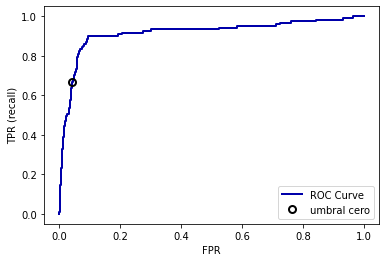

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=7,
         label="umbral cero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

La curva comienza en el $(0,0)$ correspondiendo al umbral más alto (cuando todo se clasifica como negativo) y acaba en $(1,1)$ correspondiendo al umbral más bajo (cuando todo se clasifica como positivo). Un buen comportamiento del clasificador se reflejaría en la cercanía de la curva a la esquina superior izquierda (punto $(0,1)$), ya que vamos buscando un Recall alto y un FPR bajo. 

En este caso, se observa que con un umbral inferior al umbral por defecto (cero) se puede conseguir una mejor combinación de FPR y TPR.  

Como antes, comparamos las curvas (ROC, en este caso) de los dos clasificadores que estamos usando como ejemplo:

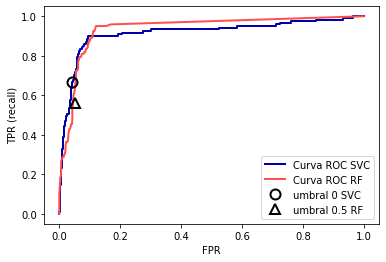

In [56]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="Curva ROC SVC")
plt.plot(fpr_rf, tpr_rf, label="Curva ROC RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="umbral 0 SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="umbral 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

Igual que antes, podemos intentar expresar mediante un solo número el rendimiento del clasificador que nos describe la curva ROC. Igual que antes, medimos el área bajo la curva y por eso esta medida se denomina AUC (_area under the curve_). Nótese que aunque la precisión media también reflejaba el área bajo la curva PR, el término AUC sólo se suele usar para referirnos al área bajo la curva ROC. En scikit learn, la función `roc_auc_score` calcula el AUC de un clasificador sobre un conjunto de ejemplos:  

In [57]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC de Random Forest: {:.3f}".format(rf_auc))
print("AUC de SVC: {:.3f}".format(svc_auc))

AUC de Random Forest: 0.937
AUC de SVC: 0.916


Como se observa, la medida AUC nos indica que el clasificador random forest es algo mejor que el basado en máquinas de vectores soporte. Nuevamente, se demuestra que cuando las clases no están equilibradas, la medidad AUC es más adecuada.

#### AUC en el ejemplo de los dígitos

Vamos a medir el comportamiento de clasificadores SVC en el problema de distinguir un nueve escrito a mano del resto de dígitos. Vamos a probar con tres clasificadores, usando tres valores respectivos del hiperparámetro `gamma` (recordar que ese hiperparámetro indica el coeficiente del kernel), y mostraremos la tasa de error, matriz de confusión, la medida AUC y la curva ROC en cada uno de los casos. El siguiente código lo hace:  

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


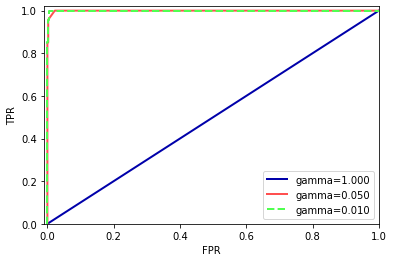

In [58]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()


for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")


Como se observa, la tasa de acierto en los tres casos es 0.9. Aparentemente buena, pero no hay que olvidar que las clases no están equilibradas. De hecho, en las matrices de confusión se observa que los tres clasificadores predicen en todos los ejemplos del conjunto de test siempre lo mismo: clase "no nueve". Por tanto en este caso, la tasa de acierto no nos está diciendo nada.

Sin embargo, si miramos las curvas ROC y la medida AUC obtenemos más información. Cuando `gamma`es 0.5, el AUC es 0.5 y la curva es una recta que va desde el $(0,0)$ al $(1,1)$. En realidad, se puede demostrar que un clasificador completamente aleatorio tendería a tener una curva de ese tipo y un AUC de 0.5, por lo que podemos decir que sería un clasificador no mejor que uno aleatorio.

Por otro lado cuando `gamma` es 0.01 tenemos un AUC de 1.0, el mejor resultado que se puede obtener con esta medida (en realidad es un poco menos, pero aparece redondeado). Veamos en qué sentido este clasificador es bueno, imprimiendo los puntos de la curva ROC para `gamma=0.01`:

In [59]:
svc = SVC(gamma=0.01).fit(X_train, y_train)
pred_svc=svc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test , pred_svc)
for f,t,thr in zip(fpr, tpr, thresholds):
    print("Umbral: {:.8f}. (FPR,TPR): ({:.8f},{:.8f})".format(thr,f,t))

Umbral: 0.91344032. (FPR,TPR): (0.00000000,0.00000000)
Umbral: -0.08655968. (FPR,TPR): (0.00000000,0.02127660)
Umbral: -0.83539697. (FPR,TPR): (0.00000000,0.85106383)
Umbral: -0.83552842. (FPR,TPR): (0.00248139,0.85106383)
Umbral: -0.85593154. (FPR,TPR): (0.00248139,0.95744681)
Umbral: -0.85705490. (FPR,TPR): (0.00496278,0.95744681)
Umbral: -0.85810213. (FPR,TPR): (0.00496278,1.00000000)
Umbral: -1.02579160. (FPR,TPR): (1.00000000,1.00000000)


   Se observa que hay un umbral (que no es el umbral de 0 que se usa por defecto, sino -0.85810213) en el que se tiene un TPR (recall) de 1.0 y un FPR muy cercano a cero. Es decir una clasificación casi perfecta. Comprobémoslo, usando ese umbral: 

In [60]:
y_pred_mod = svc.decision_function(X_test) > -.85810213
print("Matriz de confusión cambiando el umbral:\n",confusion_matrix(y_test,y_pred_mod))

Matriz de confusión cambiando el umbral:
 [[401   2]
 [  0  47]]


Podemos decir que el clasificador necesitaba "calibrar" el umbral, pero que es bueno en el sentido de que todos lo ejemplos "nueve" tienen valores de la función de decisión por encima de todos los ejemplos "no nueve". 

Esto es algo que hemos podido descubrir analizado el rendimiento con la curva ROC y la medida AUC.

## Parte 7: Clasificación multiclase

Para problemas con más de dos clases, en el que las clases no están equilibradas, surgen los mismos problemas que ya se ha visto, si simplemente miramos la tasa de aciertos. Como antes, la matriz de confusión nos da una información más fina. Veamos por ejemplo cómo se comporta regresión logística con el problema de los dígitos, con diez clases:

In [61]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Tasa de acierto: {:.3f}".format(accuracy_score(y_test, pred)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_test, pred)))

Tasa de acierto: 0.951
Matriz de confusión:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Los conceptos de precision, recall y medida F1 se definen de forma análoga para cada posible clase, considerando en cada caso el problema de clasificación binaria de esa clase frente al resto. Los valores medios de precision, recall y F1 se calculan de manera ponderada, teniendo en cuente el _soporte_ de cada clase. La función `classiication_report` nos da toda esa información:

In [62]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

